In [2]:
import pandas as pd

df =pd.read_csv('Coffe_sales.csv', dtype={'column_name': 'string'})

In [3]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
df['money'].describe()

count    3547.000000
mean       31.645216
std         4.877754
min        18.120000
25%        27.920000
50%        32.820000
75%        35.760000
max        38.700000
Name: money, dtype: float64

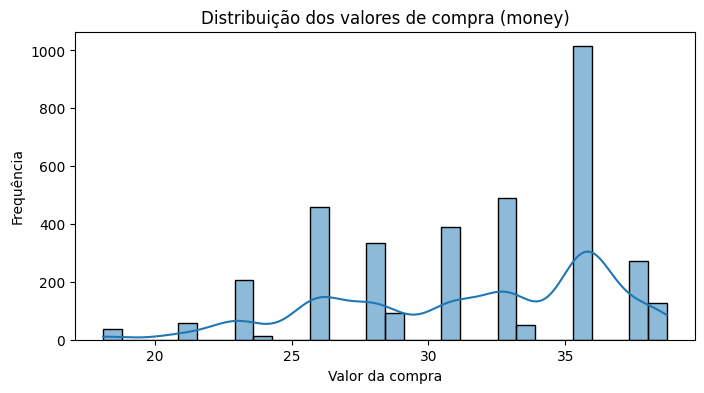

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['money'], bins=30, kde=True)  # kde=True adiciona a curva de densidade
plt.title('Distribuição dos valores de compra (money)')
plt.xlabel('Valor da compra')
plt.ylabel('Frequência')
plt.show()


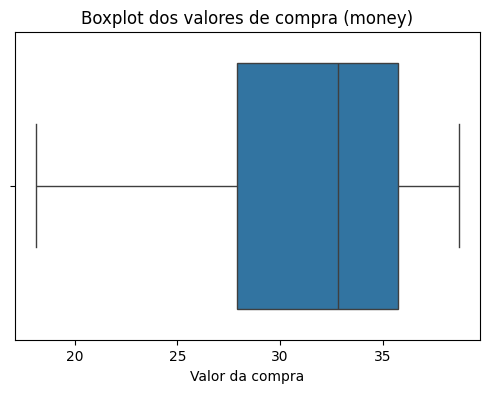

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['money'])
plt.title('Boxplot dos valores de compra (money)')
plt.xlabel('Valor da compra')
plt.show()


In [8]:
df['coffee_name'].value_counts()


coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

In [9]:
df['coffee_name'].value_counts(normalize=True) * 100


coffee_name
Americano with Milk    22.808007
Latte                  21.341979
Americano              15.900761
Cappuccino             13.701720
Cortado                 8.091345
Hot Chocolate           7.781224
Cocoa                   6.738089
Espresso                3.636876
Name: proportion, dtype: float64

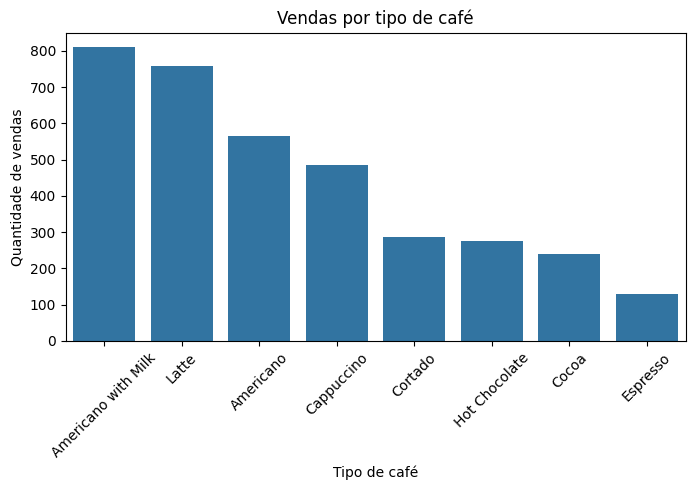

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title('Vendas por tipo de café')
plt.xlabel('Tipo de café')
plt.ylabel('Quantidade de vendas')
plt.xticks(rotation=45)
plt.show()


In [11]:
pd.crosstab(df['Time_of_Day'], df['coffee_name'])


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
Time_of_Day,,,,,,,,
Afternoon,233,239,164,75,88,56,80,270
Morning,219,331,122,58,143,44,49,215
Night,112,239,200,106,56,29,147,272


In [12]:
pd.crosstab(df['Time_of_Day'], df['coffee_name'], normalize='index') * 100


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
Time_of_Day,,,,,,,,
Afternoon,19.336100,19.834025,13.609959,6.224066,7.302905,4.647303,6.639004,22.406639
Morning,18.543607,28.027096,10.330229,4.911092,12.108383,3.725656,4.149026,18.204911
Night,9.646856,20.585702,17.226529,9.130060,4.823428,2.497847,12.661499,23.428079


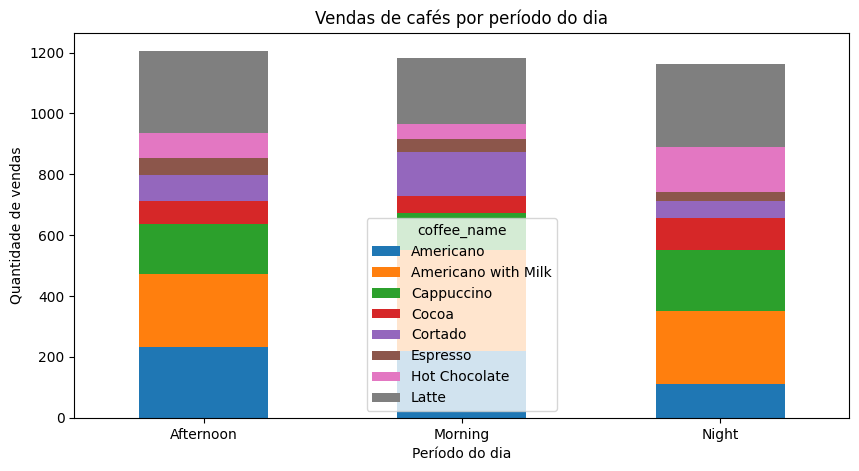

In [13]:
crosstab = pd.crosstab(df['Time_of_Day'], df['coffee_name'])
crosstab.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Vendas de cafés por período do dia')
plt.xlabel('Período do dia')
plt.ylabel('Quantidade de vendas')
plt.xticks(rotation=0)
plt.show()


In [14]:
df['hour_of_day'].value_counts().sort_index()


hour_of_day
6       5
7      88
8     235
9     242
10    328
11    283
12    241
13    225
14    225
15    236
16    278
17    237
18    218
19    229
20    169
21    195
22    113
Name: count, dtype: int64

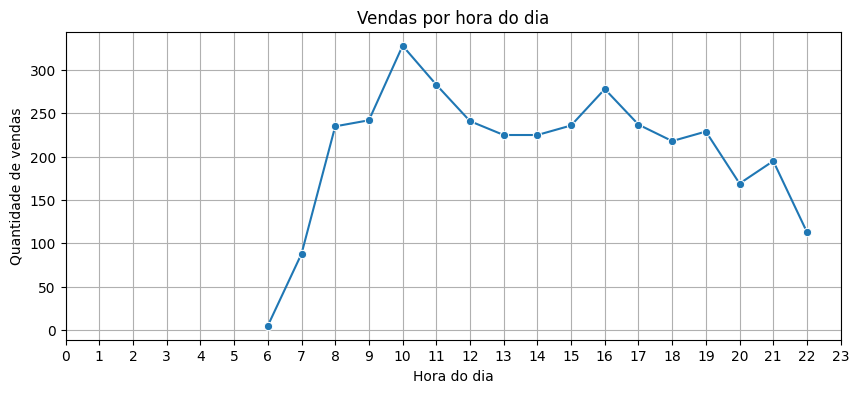

In [15]:
hourly_sales = df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Vendas por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Quantidade de vendas')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


In [16]:
cafe_por_hora = pd.crosstab(df['hour_of_day'], df['coffee_name'])
cafe_por_hora


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
hour_of_day,,,,,,,,
6,2,2,1,0,0,0,0,0
7,12,18,20,4,2,2,0,30
8,48,51,22,15,41,6,5,47
9,27,94,23,15,33,9,7,34
10,59,101,28,8,33,12,21,66
11,71,65,28,16,34,15,16,38
12,55,55,29,14,20,13,9,46
13,46,56,30,11,24,7,10,41
14,43,43,36,17,16,10,13,47


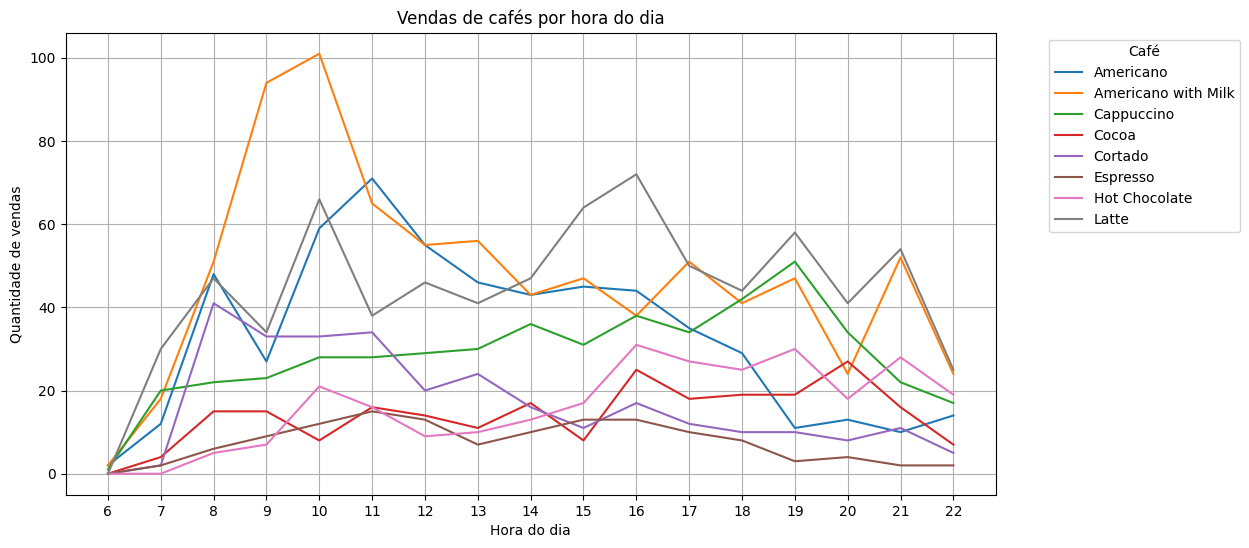

In [17]:
cafe_por_hora.plot(figsize=(12,6))
plt.title('Vendas de cafés por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Quantidade de vendas')
plt.xticks(range(6,23))  # Ajusta os ticks para seu horário de 6h a 22h
plt.legend(title='Café', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [18]:
monthly_sales = df.groupby(['Monthsort', 'Month_name']).size().sort_index()
monthly_sales


Monthsort  Month_name
1          Jan           201
2          Feb           423
3          Mar           494
4          Apr           168
5          May           241
6          Jun           223
7          Jul           237
8          Aug           272
9          Sep           344
10         Oct           426
11         Nov           259
12         Dec           259
dtype: int64

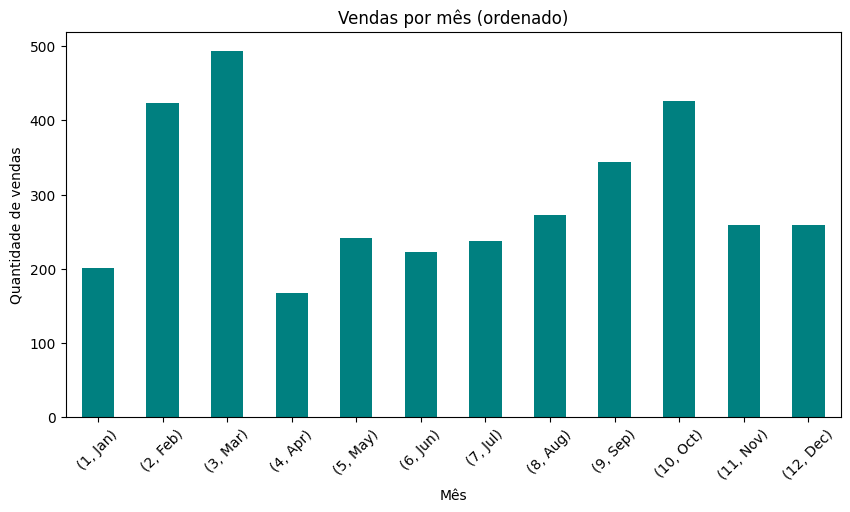

In [19]:
monthly_sales.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Vendas por mês (ordenado)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vendas')
plt.xticks(rotation=45)
plt.show()


In [20]:
numerical_cols = ['money', 'hour_of_day', 'Weekdaysort', 'Monthsort']
df[numerical_cols].corr()


,money,hour_of_day,Weekdaysort,Monthsort
money,1.000000,0.202748,-0.017264,-0.050043
hour_of_day,0.202748,1.000000,-0.002614,0.008293
Weekdaysort,-0.017264,-0.002614,1.000000,0.044141
Monthsort,-0.050043,0.008293,0.044141,1.000000


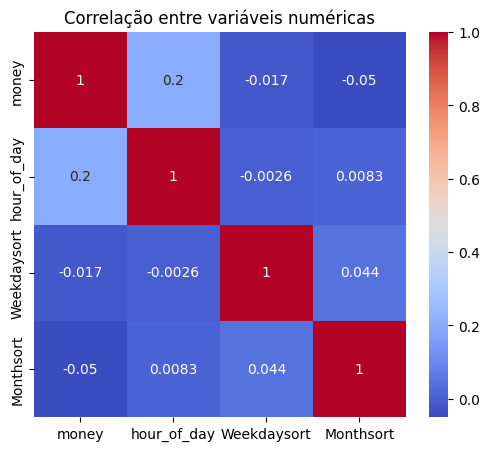

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()


In [22]:
ticket_medio = df.groupby(['Time_of_Day', 'coffee_name'])['money'].mean()
ticket_medio


Time_of_Day  coffee_name        
Afternoon    Americano              26.325923
             Americano with Milk    30.896904
             Cappuccino             36.040854
             Cocoa                  35.812267
             Cortado                26.316364
             Espresso               21.235000
             Hot Chocolate          36.237750
             Latte                  35.596667
Morning      Americano              25.767580
             Americano with Milk    30.288580
             Cappuccino             35.470820
             Cocoa                  35.506552
             Cortado                25.213007
             Espresso               19.857273
             Hot Chocolate          35.600000
             Latte                  35.582233
Night        Americano              25.653750
             Americano with Milk    30.716485
             Cappuccino             36.005000
             Cocoa                  35.621321
             Cortado                26.135000
 

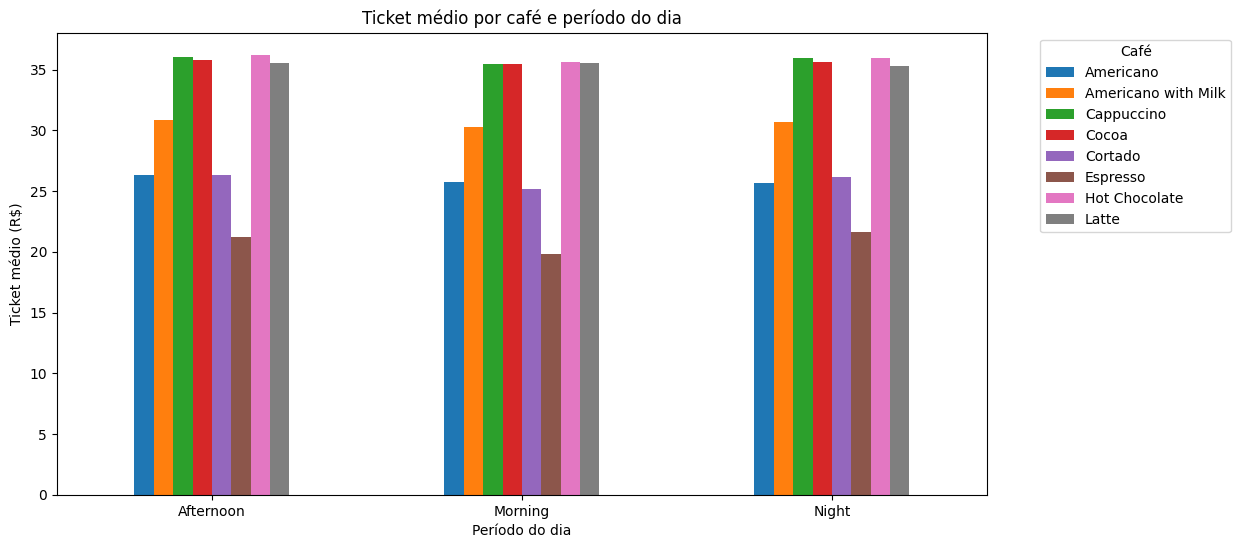

In [23]:
ticket_medio.unstack().plot(kind='bar', figsize=(12,6))
plt.title('Ticket médio por café e período do dia')
plt.xlabel('Período do dia')
plt.ylabel('Ticket médio (R$)')
plt.xticks(rotation=0)
plt.legend(title='Café', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [24]:
ticket_medio_mes = df.groupby(['Monthsort', 'Month_name'])['money'].mean().sort_index()
ticket_medio_mes


Monthsort  Month_name
1          Jan           31.835124
2          Feb           31.242270
3          Mar           32.169312
4          Apr           34.045000
5          May           33.877261
6          Jun           34.160359
7          Jul           29.181181
8          Aug           27.992059
9          Sep           29.036744
10         Oct           32.608357
11         Nov           33.168108
12         Dec           31.805946
Name: money, dtype: float64

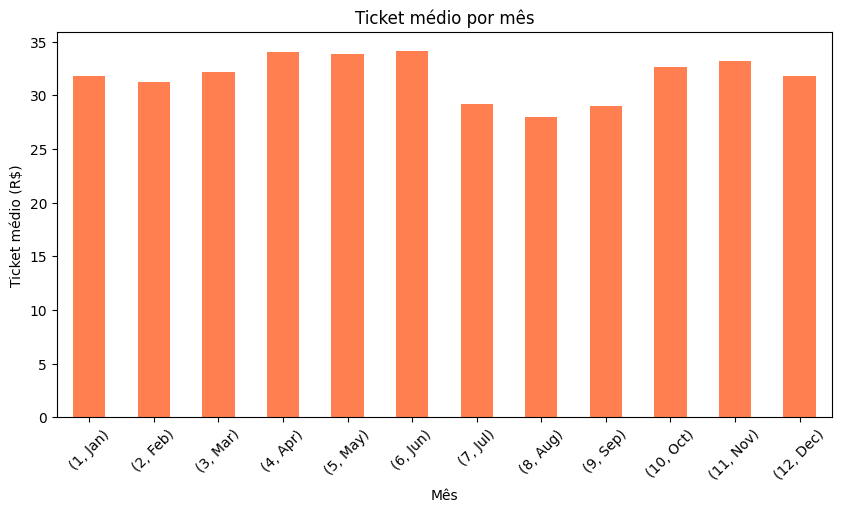

In [25]:
ticket_medio_mes.plot(kind='bar', figsize=(10,5), color='coral')
plt.title('Ticket médio por mês')
plt.xlabel('Mês')
plt.ylabel('Ticket médio (R$)')
plt.xticks(rotation=45)
plt.show()


In [26]:
"""
##############################################################
#                       EDA - Coffee Sales                  #
##############################################################

1. Visão Geral dos Dados
- Transações: 3.547 vendas
- Colunas principais: money, coffee_name, Time_of_Day, hour_of_day, Weekday, Month_name
- Valores ausentes: nenhum
- Ticket médio geral: ~31,65 R$

2. Distribuição do Valor da Compra (money)
- Faixa principal: 27–35 R$
- Valor médio: 31,65 R$
- Distribuição: ligeiramente inclinada para a direita, sem outliers
- Insight: a maioria das vendas concentra-se em valores moderados, estáveis durante o dia e ao longo do ano

3. Vendas por Tipo de Café (coffee_name)
- Mais vendidos (volume):
    1. Americano with Milk (809)
    2. Latte (757)
    3. Americano (564)
- Menos vendidos: Espresso (129), Cocoa (239)
- Insight: cafés suaves/leitosos dominam em quantidade; cafés fortes ou doces vendem menos em volume

4. Padrões por Período do Dia (Time_of_Day)
- Morning: Americano with Milk e Cortado dominam
- Afternoon: Latte e Americano with Milk fortes
- Night: Latte, Hot Chocolate e Cocoa crescem; cafés fortes caem
- Insight: manhã = cafés suaves/leitosos, noite = bebidas doces, útil para planejamento de estoque e marketing

5. Padrões por Hora do Dia (hour_of_day)
- Pico principal: 10h (328 vendas)
- Pico secundário: 16h (278 vendas)
- Horários calmos: 6h (5 vendas) e 22h (113 vendas)
- Insight: concentração de vendas em manhã e meio da tarde, ideal para otimizar equipe e produção

6. Padrões Sazonais (Month_name)
- Meses mais fortes: Fevereiro, Março e Outubro
- Meses mais fracos: Janeiro, Abril e Junho
- Insight: sazonalidade clara, útil para planejamento de estoque e campanhas promocionais

7. Ticket Médio por Café e Período
- Mais lucrativos: Cappuccino, Hot Chocolate, Cocoa, Latte (~35–36 R$)
- Menos lucrativos: Espresso (~20 R$), Americano (~25–26 R$), Cortado (~25–26 R$)
- Insight: produtos premium geram maior receita; combinados com horários de pico podem maximizar lucro

8. Ticket Médio por Mês
- Maior ticket médio: Junho, Abril, Maio (~34 R$)
- Menor ticket médio: Agosto, Setembro, Julho (~28–29 R$)
- Insight: ticket médio e volume nem sempre caminham juntos; estratégias devem considerar volume x receita por venda

9. Correlação entre Variáveis Numéricas
- money x hour_of_day = 0.20 → fraca tendência de aumento do ticket em horas mais altas
- money x Weekdaysort / Monthsort ≈ 0 → valor médio da compra é estável ao longo da semana e ano
- Insight: planejamento de estoque e promoções deve focar em quantidade e horários de pico, não no valor médio da compra

Conclusão Estratégica
1. Planejamento de estoque: focar nos cafés mais vendidos em horários de pico e períodos de alta sazonalidade
2. Promoções: incentivar produtos de maior ticket médio (Cappuccino, Hot Chocolate, Latte) nos meses/horários de menor movimento
3. Gestão de equipe: reforçar atendimento em manhã e meio da tarde
4. Marketing: ajustar campanhas sazonais e por hora do dia para maximizar receita
"""


'\n##############################################################\n#                       EDA - Coffee Sales                  #\n##############################################################\n\n1. Visão Geral dos Dados\n- Transações: 3.547 vendas\n- Colunas principais: money, coffee_name, Time_of_Day, hour_of_day, Weekday, Month_name\n- Valores ausentes: nenhum\n- Ticket médio geral: ~31,65 R$\n\n2. Distribuição do Valor da Compra (money)\n- Faixa principal: 27–35 R$\n- Valor médio: 31,65 R$\n- Distribuição: ligeiramente inclinada para a direita, sem outliers\n- Insight: a maioria das vendas concentra-se em valores moderados, estáveis durante o dia e ao longo do ano\n\n3. Vendas por Tipo de Café (coffee_name)\n- Mais vendidos (volume):\n    1. Americano with Milk (809)\n    2. Latte (757)\n    3. Americano (564)\n- Menos vendidos: Espresso (129), Cocoa (239)\n- Insight: cafés suaves/leitosos dominam em quantidade; cafés fortes ou doces vendem menos em volume\n\n4. Padrões por Período

In [27]:
# ==============================
# Pipeline Regressão Linear
# ==============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------------
# Definir features e target
# ------------------------------
X = df[['hour_of_day', 'Weekdaysort', 'Monthsort', 'coffee_name', 'Time_of_Day']]
y = df['money']

# ------------------------------
# Pré-processamento
# ------------------------------
# Variáveis categóricas
categorical_features = ['coffee_name', 'Time_of_Day', 'Weekdaysort', 'Monthsort']
# Variáveis numéricas
numeric_features = ['hour_of_day']

# Transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# ------------------------------
# Pipeline com Regressão Linear
# ------------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# ------------------------------
# Train Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinar
pipeline.fit(X_train, y_train)

# Predições
y_pred = pipeline.predict(X_test)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE Linear Regression: {mse:.2f}")
print(f"R² Linear Regression: {r2:.2f}")



MSE Linear Regression: 0.54
R² Linear Regression: 0.98


In [28]:
# Avaliação no treino
y_train_pred = pipeline.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"MSE Treino: {mse_train:.2f}")
print(f"R² Treino: {r2_train:.2f}")

# Avaliação no teste (já tínhamos)
print(f"MSE Teste: {mse:.2f}")
print(f"R² Teste: {r2:.2f}")


MSE Treino: 0.53
R² Treino: 0.98
MSE Teste: 0.54
R² Teste: 0.98
